## **PCA involve reduction in dimension ,here we are reducing 2 dimensional data to 1 dimension**

In [0]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sklearn.datasets
import pandas as pd

In [0]:
x,y=sklearn.datasets.load_boston(100)


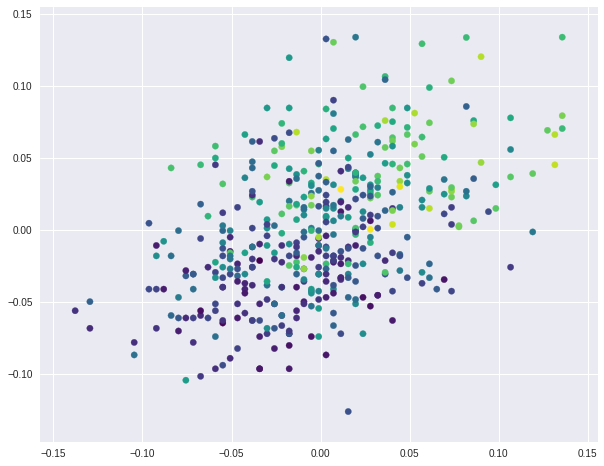

In [4]:
### ---- Ploting the dataset ---###
%matplotlib inline 
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0) 
 

np.random.seed(3) 
x, y = sklearn.datasets.load_diabetes(100) 


plt.scatter(x[:,9], x[:,8], s=40,c=y,cmap=plt.cm.viridis)

**Normalizing the dataset**

In [0]:
### computing mean ###
meanx=np.sum(x[:,8])
meanx
x_new=(x[:,8]-meanx)
max_x=np.max(x[:,8])
min_x=np.min(x[:,8])

x_new=x_new/(max_x-min_x)


# *Dataset after normalization*


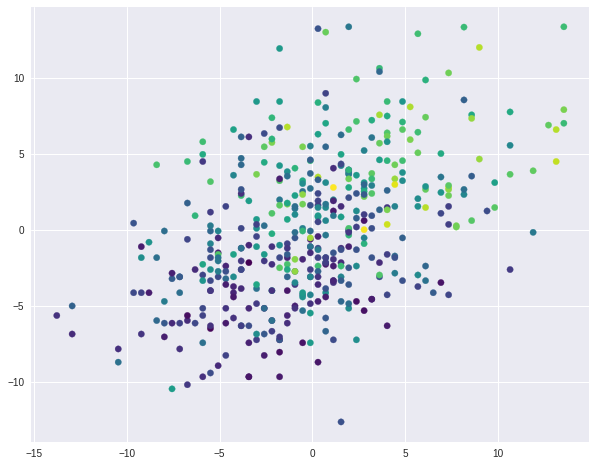

In [8]:

x[:,9]=x[:,9]*10
x[:,8]=x[:,8]*10

plt.scatter(x[:,9], x[:,8], s=40,c=y,cmap=plt.cm.viridis)

In [0]:
x1=np.zeros((x.shape[0],2))      

for i in range(x.shape[0]):
  x1[i][0]=x[i,8]
  x1[i][1]=x[i,9]

m=x1.shape[0]

sigma=(np.dot(x1.T,x1))/m        #calculating the sigma matrix

s,v,d=np.linalg.svd(sigma)       #appling singular value decomposition on sigma matrix

z=np.dot(s[:,0],x1.T)

z_main=np.zeros((442,1))
for i in range(len(z)):
  z_main[i]=z[i]
  

u_reduced=np.zeros((2,1))
for i in range(len(s[:,0])):
  u_reduced[i]=s[i,0]               

x_approx=np.dot(z_main,u_reduced.T)  #calculating reduced parameters



**The blue line represent the projection of the dataset on the projection line**

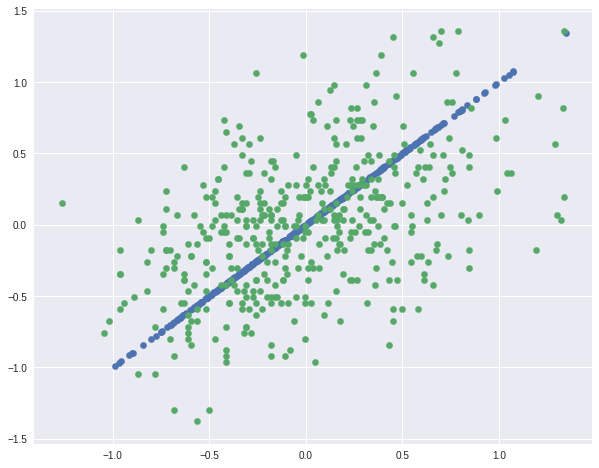

In [17]:
plt.scatter(x_approx[:,0], x_approx[:,1], s=40,cmap=plt.cm.viridis)
plt.scatter(x[:,8], x[:,9], s=40,cmap=plt.cm.viridis)

In [0]:

x[:,9]=x[:,9]
x[:,8]=x[:,8]
x[:,7]=x[:,7]*10
x1=np.zeros((x.shape[0],3))      

for i in range(x.shape[0]):
  x1[i][0]=x[i,8]
  x1[i][1]=x[i,9]
  x1[i][2]=x[i,7]

m=x1.shape[0]

sigma=(np.dot(x1.T,x1))/m        #calculating the sigma matrix

s,v,d=np.linalg.svd(sigma)       #appling singular value decomposition on sigma matrix

z=np.dot(s[:,0],x1.T)

z_main=np.zeros((442,2))
for i in range(len(z)):
  z_main[i]=z[i]
   

u_reduced=np.zeros((3,2))
for i in range(len(s[:,0])):
  u_reduced[i,0]=s[i,0]
  
for j in range(len(s[:,0])):
  u_reduced[i,1]=s[i,1]
  
x_approx=np.dot(z_main,u_reduced.T)


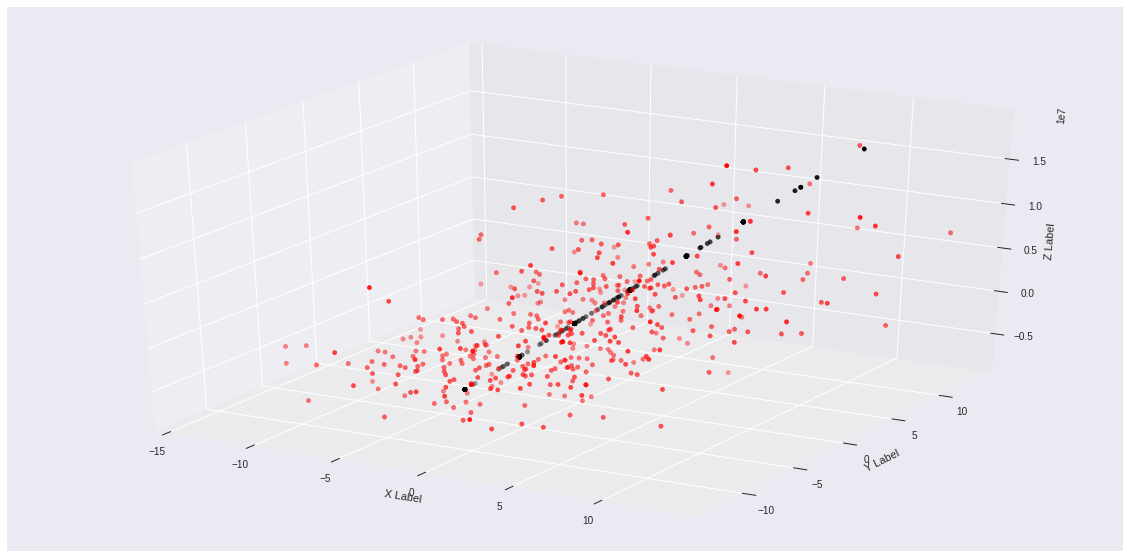

In [46]:


from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
fig_size=plt.rcParams['figure.figsize']
fig_size[0]=10
fig_size[1]=10

ax.scatter(x[:,9],x[:,8],x[:,7],c='r',marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

ax.scatter(x_approx[:,0],x_approx[:,1] ,x_approx[:,2],c='black')